In [1]:
from pyspark.sql import SparkSession

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pyspark.sql.functions as f

### Create Spark Session

In [4]:
# create a spark session
spark = SparkSession.builder.appName('Spark_Assignment').getOrCreate()

In [5]:
spark

In [20]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

### Load the Dataset

In [7]:
df_pyspark = spark.read.csv('data.csv', header=True, inferSchema=True)

In [8]:
df_pyspark

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEA...,6,12/1/2010 8:26,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEART...,8,12/1/2010 8:26,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLA...,6,12/1/2010 8:26,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE...,6,12/1/2010 8:26,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NE...,2,12/1/2010 8:26,7.65,17850,United Kingdom
536365,21730,GLASS STAR FROSTE...,6,12/1/2010 8:26,4.25,17850,United Kingdom
536366,22633,HAND WARMER UNION...,6,12/1/2010 8:28,1.85,17850,United Kingdom
536366,22632,HAND WARMER RED P...,6,12/1/2010 8:28,1.85,17850,United Kingdom
536367,84879,ASSORTED COLOUR B...,32,12/1/2010 8:34,1.69,13047,United Kingdom


In [9]:
df_pyspark.take(5)

[Row(InvoiceNo='536365', StockCode='85123A', Description='WHITE HANGING HEART T-LIGHT HOLDER', Quantity=6, InvoiceDate='12/1/2010 8:26', UnitPrice=2.55, CustomerID=17850, Country='United Kingdom'),
 Row(InvoiceNo='536365', StockCode='71053', Description='WHITE METAL LANTERN', Quantity=6, InvoiceDate='12/1/2010 8:26', UnitPrice=3.39, CustomerID=17850, Country='United Kingdom'),
 Row(InvoiceNo='536365', StockCode='84406B', Description='CREAM CUPID HEARTS COAT HANGER', Quantity=8, InvoiceDate='12/1/2010 8:26', UnitPrice=2.75, CustomerID=17850, Country='United Kingdom'),
 Row(InvoiceNo='536365', StockCode='84029G', Description='KNITTED UNION FLAG HOT WATER BOTTLE', Quantity=6, InvoiceDate='12/1/2010 8:26', UnitPrice=3.39, CustomerID=17850, Country='United Kingdom'),
 Row(InvoiceNo='536365', StockCode='84029E', Description='RED WOOLLY HOTTIE WHITE HEART.', Quantity=6, InvoiceDate='12/1/2010 8:26', UnitPrice=3.39, CustomerID=17850, Country='United Kingdom')]

In [10]:
## check the schema
df_pyspark.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



### Exploratory Data Analysis

In [11]:
df_pyspark.describe()


summary,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909,541909,541909,406829,541909
mean,559965.752026781,27623.240210938104,20713.0,9.55224954743324,null,4.6111136260897085,15287.690570239585,null
stddev,13428.417280796779,16799.737628427658,null,218.08115785023438,null,96.75985306117963,1713.6003033215982,null
min,536365,10002,4 PURPLE FLOCK D...,-80995,1/10/2011 10:04,-11062.06,12346,Australia
max,C581569,m,wrongly sold sets,80995,9/9/2011 9:52,38970.0,18287,Unspecified


In [12]:
## missing values count

# null values in each column
data_agg = df_pyspark.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in df_pyspark.columns])
data_agg.show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
|        0|        0|       1454|       0|          0|        0|    135080|      0|
+---------+---------+-----------+--------+-----------+---------+----------+-------+



In [13]:
# drop null values
df_pyspark = df_pyspark.na.drop()

data_agg = df_pyspark.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in df_pyspark.columns])
data_agg.show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
|        0|        0|          0|       0|          0|        0|         0|      0|
+---------+---------+-----------+--------+-----------+---------+----------+-------+



In [15]:
# value counts of Country column
df_country_res = df_pyspark.groupBy('Country').count().sort('count', ascending=False)
df_country_res.show() #remove

+---------------+------+
|        Country| count|
+---------------+------+
| United Kingdom|361878|
|        Germany|  9495|
|         France|  8491|
|           EIRE|  7485|
|          Spain|  2533|
|    Netherlands|  2371|
|        Belgium|  2069|
|    Switzerland|  1877|
|       Portugal|  1480|
|      Australia|  1259|
|         Norway|  1086|
|          Italy|   803|
|Channel Islands|   758|
|        Finland|   695|
|         Cyprus|   622|
|         Sweden|   462|
|        Austria|   401|
|        Denmark|   389|
|          Japan|   358|
|         Poland|   341|
+---------------+------+
only showing top 20 rows



<AxesSubplot:xlabel='Country'>

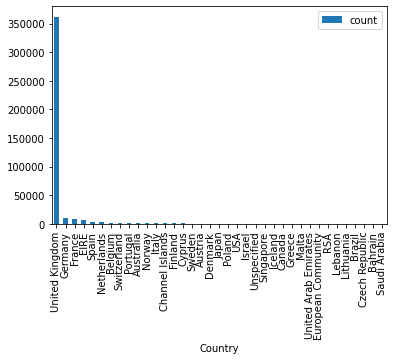

In [16]:
df_country_res.toPandas().plot.bar(x='Country')

In [17]:
# spark.conf.set('spark.sql.repl.eagerEval.enabled', False)

In [25]:
# convert date values from string to timestamp type
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import unix_timestamp
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")

df_new = df_pyspark.withColumn('InvoiceDate', unix_timestamp("InvoiceDate", 'MM/dd/yyyy HH:mm').cast(TimestampType()))
df_new


InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEA...,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEART...,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLA...,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE...,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NE...,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
536365,21730,GLASS STAR FROSTE...,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
536366,22633,HAND WARMER UNION...,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
536366,22632,HAND WARMER RED P...,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
536367,84879,ASSORTED COLOUR B...,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [26]:
df_new.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



In [27]:
# check for missing values
data_agg = df_pyspark.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in df_pyspark.columns])
data_agg.show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
|        0|        0|          0|       0|          0|        0|         0|      0|
+---------+---------+-----------+--------+-----------+---------+----------+-------+



In [32]:
df_new.select(['Quantity', 'UnitPrice', 'CustomerID']).describe()

summary,Quantity,UnitPrice,CustomerID
count,406829,406829,406829
mean,12.06130339774205,3.46047101853651,15287.690570239585
stddev,248.69337001882474,69.31516172321444,1713.6003033215982
min,-80995,0.0,12346
max,80995,38970.0,18287


#### Remove Quantity with negative values

In [33]:
df_new = df_new.filter(df_new['quantity'] > 0)

In [34]:
df_new.select(['Quantity', 'UnitPrice', 'CustomerID']).describe()

summary,Quantity,UnitPrice,CustomerID
count,397924,397924,397924
mean,13.021823262733587,3.116174480554297,15294.315170736121
stddev,180.4202099169815,22.09678803168587,1713.1698773382175
min,1,0.0,12346
max,80995,8142.75,18287


#### Add the column - amount_spent

In [39]:
# add new column with amount_spent
df_new = df_new.withColumn('Amount_Spent', df_new['Quantity']*df_new['UnitPrice'])
# round amont_spent to 2 decimals
df_new = df_new.withColumn("Amount_Spent", f.round(df_new["Amount_Spent"], 2))
# rearrange the columns
df_new = df_new.select("InvoiceNo", "InvoiceDate", "StockCode", "Description", "Quantity", "UnitPrice", "Amount_Spent", "CustomerID", "Country")

df_new

InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country
536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEA...,6,2.55,15.3,17850,United Kingdom
536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEART...,8,2.75,22.0,17850,United Kingdom
536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLA...,6,3.39,20.34,17850,United Kingdom
536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE...,6,3.39,20.34,17850,United Kingdom
536365,2010-12-01 08:26:00,22752,SET 7 BABUSHKA NE...,2,7.65,15.3,17850,United Kingdom
536365,2010-12-01 08:26:00,21730,GLASS STAR FROSTE...,6,4.25,25.5,17850,United Kingdom
536366,2010-12-01 08:28:00,22633,HAND WARMER UNION...,6,1.85,11.1,17850,United Kingdom
536366,2010-12-01 08:28:00,22632,HAND WARMER RED P...,6,1.85,11.1,17850,United Kingdom
536367,2010-12-01 08:34:00,84879,ASSORTED COLOUR B...,32,1.69,54.08,13047,United Kingdom


#### Add the columns - Month, Day and Hour for the invoice

Here for the day, we make +2 for the resulted day output from timestamp to make Monday=1.....
Until Sunday=7

In [63]:
df_st = df_new.rdd \
    .map(lambda x: 
         (x["InvoiceNo"], 
          x["InvoiceDate"],
          100*x["InvoiceDate"].year + x["InvoiceDate"].month, 
          x["InvoiceDate"].month,
          x["InvoiceDate"].day+2,
          x["InvoiceDate"].hour,
          x["StockCode"], 
          x["Description"],
          x["Quantity"], 
          x["UnitPrice"],
          x["Amount_Spent"], 
          x["CustomerID"],
          x["Country"])) \
    .toDF(["InvoiceNo", "InvoiceDate", "year_month", 
           "month", 
           "day", 
           "hour", 
           "StockCode", "Description", "Quantity", "UnitPrice", "Amount_Spent", "CustomerID", 
           "Country"])
df_st


InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country
536365,2010-12-01 08:26:00,201012,12,3,8,85123A,WHITE HANGING HEA...,6,2.55,15.3,17850,United Kingdom
536365,2010-12-01 08:26:00,201012,12,3,8,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
536365,2010-12-01 08:26:00,201012,12,3,8,84406B,CREAM CUPID HEART...,8,2.75,22.0,17850,United Kingdom
536365,2010-12-01 08:26:00,201012,12,3,8,84029G,KNITTED UNION FLA...,6,3.39,20.34,17850,United Kingdom
536365,2010-12-01 08:26:00,201012,12,3,8,84029E,RED WOOLLY HOTTIE...,6,3.39,20.34,17850,United Kingdom
536365,2010-12-01 08:26:00,201012,12,3,8,22752,SET 7 BABUSHKA NE...,2,7.65,15.3,17850,United Kingdom
536365,2010-12-01 08:26:00,201012,12,3,8,21730,GLASS STAR FROSTE...,6,4.25,25.5,17850,United Kingdom
536366,2010-12-01 08:28:00,201012,12,3,8,22633,HAND WARMER UNION...,6,1.85,11.1,17850,United Kingdom
536366,2010-12-01 08:28:00,201012,12,3,8,22632,HAND WARMER RED P...,6,1.85,11.1,17850,United Kingdom
536367,2010-12-01 08:34:00,201012,12,3,8,84879,ASSORTED COLOUR B...,32,1.69,54.08,13047,United Kingdom


### Calculating how many orders made by the customers

#### Find the top 10 customers with most number of orders

In [138]:
from pyspark.sql.functions import count, avg

df_orders = df_st.groupBy("CustomerID", "Country").agg(count("InvoiceNo").alias('count_InvoiceNo')).sort('count_InvoiceNo', ascending=False)
df_orders.show(10)



+----------+--------------+---------------+
|CustomerID|       Country|count_InvoiceNo|
+----------+--------------+---------------+
|     17841|United Kingdom|           7847|
|     14911|          EIRE|           5677|
|     14096|United Kingdom|           5111|
|     12748|United Kingdom|           4596|
|     14606|United Kingdom|           2700|
|     15311|United Kingdom|           2379|
|     14646|   Netherlands|           2080|
|     13089|United Kingdom|           1818|
|     13263|United Kingdom|           1677|
|     14298|United Kingdom|           1637|
+----------+--------------+---------------+
only showing top 10 rows



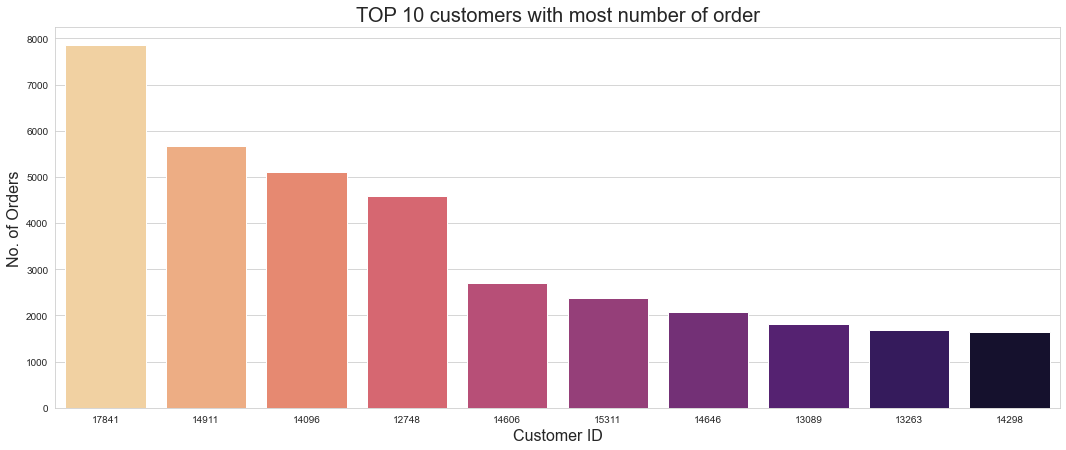

In [141]:
df_orders_pd = df_orders.limit(10).toPandas()

# plot in a graph
fig_dims = (18, 7)
plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")
b = sns.barplot(data=df_orders_pd, x='CustomerID', y='count_InvoiceNo', palette='magma_r', order=df_orders_pd['CustomerID'])
b.axes.set_title("TOP 10 customers with most number of order",fontsize=20)
b.set_xlabel("Customer ID",fontsize=16)
b.set_ylabel("No. of Orders",fontsize=16)


plt.show()


### Ckecking how much money spent by the customers?

In [91]:
df_amount_spent = df_st.groupBy('CustomerID').agg({'Amount_Spent':'sum'})
df_amount_spent.show(5)

+----------+-----------------+
|CustomerID|sum(Amount_Spent)|
+----------+-----------------+
|     15194|7616.530000000001|
|     17048|925.3500000000001|
|     13098|         28882.44|
|     15057|           1489.5|
|     18196|689.1300000000001|
+----------+-----------------+
only showing top 5 rows



In [95]:
# top 5 customers with highest money spent 
df_amount_spent_sorted = df_amount_spent.sort('sum(Amount_Spent)', ascending=False)
df_amount_spent_sorted.show(5)

+----------+------------------+
|CustomerID| sum(Amount_Spent)|
+----------+------------------+
|     14646|280206.01999999984|
|     18102|259657.29999999996|
|     17450|194550.78999999998|
|     16446|          168472.5|
|     14911|143825.06000000006|
+----------+------------------+
only showing top 5 rows



In [143]:
df_amount_spent_sorted = df_amount_spent_sorted.withColumn("Total_Amount_Spent", f.round(df_amount_spent_sorted["sum(Amount_Spent)"], 2))
df_amount_spent_sorted.show(10)


+----------+------------------+------------------+
|CustomerID| sum(Amount_Spent)|Total_Amount_Spent|
+----------+------------------+------------------+
|     14646|280206.01999999984|         280206.02|
|     18102|259657.29999999996|          259657.3|
|     17450|194550.78999999998|         194550.79|
|     16446|          168472.5|          168472.5|
|     14911|143825.06000000006|         143825.06|
|     12415|124914.53000000003|         124914.53|
|     14156|117379.63000000006|         117379.63|
|     17511|          91062.38|          91062.38|
|     16029|          81024.84|          81024.84|
|     12346|           77183.6|           77183.6|
+----------+------------------+------------------+
only showing top 10 rows



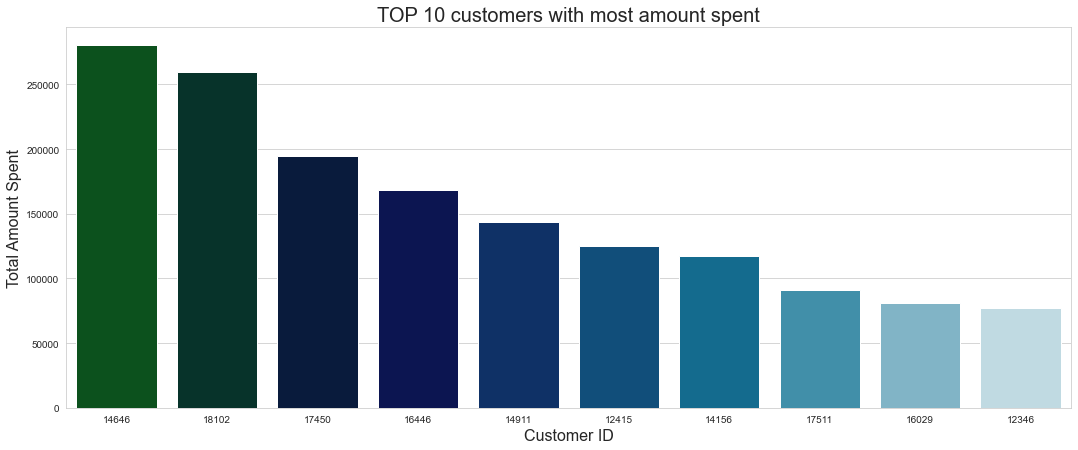

In [147]:
df_amount_spent_sorted_pd = df_amount_spent_sorted.limit(10).toPandas()

# plot in a graph
fig_dims = (18, 7)
plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")
ax = sns.barplot(data=df_amount_spent_sorted_pd, x='CustomerID', y='Total_Amount_Spent', palette='ocean', order=df_amount_spent_sorted_pd['CustomerID'])
ax.axes.set_title("TOP 10 customers with most amount spent",fontsize=20)
ax.set_xlabel("Customer ID",fontsize=16)
ax.set_ylabel("Total Amount Spent",fontsize=16)


plt.show()

### Checking for most bought items?

#### Find out what are the most bought items in Itemcode (StockCode) wise

In [96]:
df_itemcode = df_st.groupBy('StockCode').count().sort('count', ascending=False)
df_itemcode

StockCode,count
85123A,2035
22423,1724
85099B,1618
84879,1408
47566,1397
20725,1317
22720,1159
20727,1105
POST,1099
23203,1098


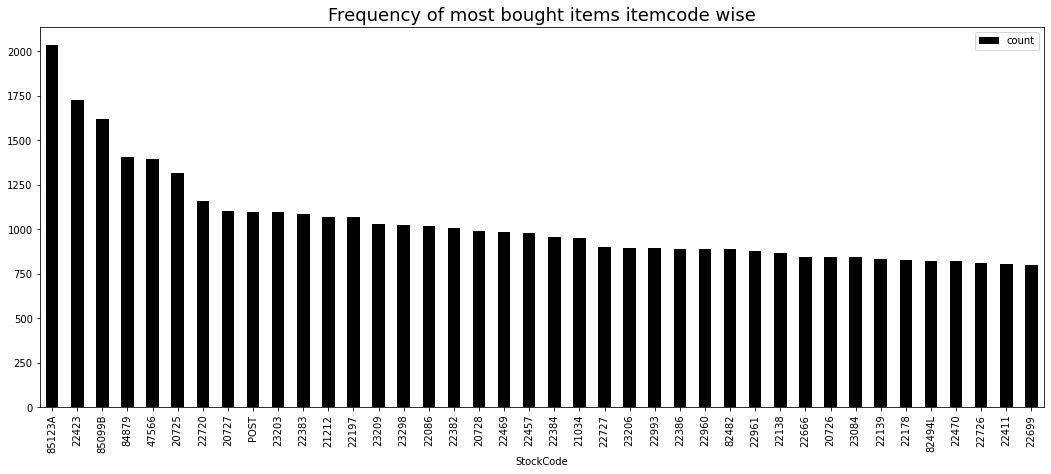

In [101]:
# import pandas as pd
import numpy as np

df_itemcode_pd = df_itemcode.limit(40).toPandas()
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df_itemcode_pd.plot.bar(color = color, x='StockCode')
plt.title('Frequency of most bought items itemcode wise', fontsize=18)
plt.show()

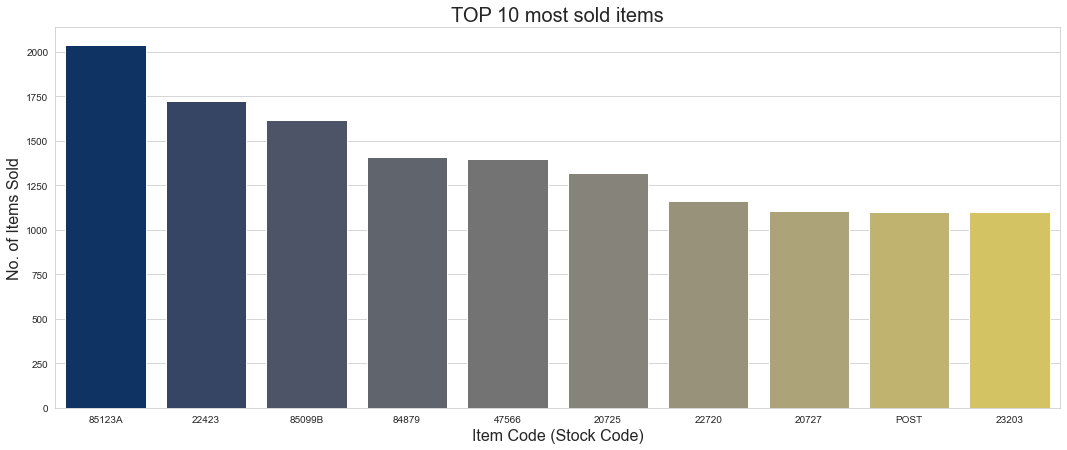

In [149]:
df_itemcode_new_pd = df_itemcode.limit(10).toPandas()

# plot in a graph
fig_dims = (18, 7)
plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")
ax3 = sns.barplot(data=df_itemcode_new_pd, x='StockCode', y='count', palette='cividis', order=df_itemcode_new_pd['StockCode'])
ax3.axes.set_title("TOP 10 most sold items",fontsize=20)
ax3.set_xlabel("Item Code (Stock Code)",fontsize=16)
ax3.set_ylabel("No. of Items Sold",fontsize=16)

plt.show()


### Countries with most Orders

#### Identifying top 5 countries with most orders

In [ ]:
# value counts of Country column
df_country_res = df_pyspark.groupBy('Country').count().sort('count', ascending=False)
df_country_res.show(5)

In [102]:
df_country_res = df_country_res.limit(5)
df_country_res

Country,count
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533


<Figure size 1296x504 with 0 Axes>

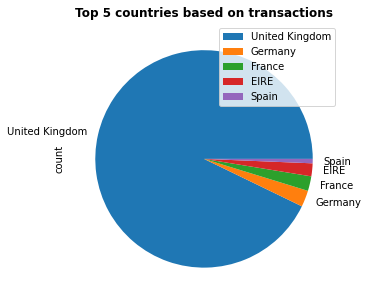

In [127]:
df_country_res_pd = df_country_res.toPandas()
df_country_res_pd = df_country_res_pd.set_index('Country')
# df_country_res_pd
# df_country_res_pd.set_index('Country', inplace=True)
plt.figure()
# df_country_res_pd.plot(kind = 'pie', autopct='%1.1f%%', y='Country', figsize=(5, 5)) #autopct -> shows the percentage
df_country_res_pd.plot.pie(y='count', figsize=(5, 5))
#plt.pie(df['Country'].value_counts()[:5], autopct='%1.1f%%')  #does the same thing but w/o the country labels
plt.title('Top 5 countries based on transactions', weight='bold')
plt.show()


In [130]:
import plotly.graph_objs as go
import warnings
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

temp = df_st[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.toPandas()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()

data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order no.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

### Apply Machine Learning for Predicting Quantity